> #### Setup  

> Before running data.world notebooks for the first time, you'll need to:  
1. Install data.world's Python package, including optional `pandas` dependencies: 
```shell
pip install git+git://github.com/datadotworld/data.world-py.git#egg=project[pandas]
```
1. Obtain an API access token at https://data.world/settings/advanced
1. Store API access token using the `dw` command-line tool: 
```shell
dw configure
```

> Once your environment is set up, these steps do not need to be repeated for other data.world notebooks.

In [3]:
import datadotworld as dw
import charts_function_list
import os

In [4]:
base_, data, outputs = charts_function_list.folder_setup()

In [2]:
# Datasets are referenced by their path
dataset_key = 'len/intelligence-of-dogs'

# Or simply by their URL
dataset_key = 'https://data.world/len/intelligence-of-dogs'

In [5]:
# Load dataset (onto the local file system)
dogs = dw.load_dataset(dataset_key)  # cached under ~/.dw/cache

In [78]:
dog_frame = pd.DataFrame(dogs.tables['dog_intelligence'])
dog_frame.fillna({'obey':.25},inplace=True)

,breed,classification,obey,reps_lower,reps_upper
0,Border Collie,Brightest Dogs,0.95,1,4
1,Poodle,Brightest Dogs,0.95,1,4
2,German Shepherd,Brightest Dogs,0.95,1,4
3,Golden Retriever,Brightest Dogs,0.95,1,4
4,Doberman Pinscher,Brightest Dogs,0.95,1,4
5,Shetland Sheepdog,Brightest Dogs,0.95,1,4
6,Labrador Retriever,Brightest Dogs,0.95,1,4
7,Papillon,Brightest Dogs,0.95,1,4
8,Rottweiler,Brightest Dogs,0.95,1,4
9,Australian Cattle Dog,Brightest Dogs,0.95,1,4


In [38]:
dog_chart = charts_function_list.chart_maker(title ='Dog Intelligence')

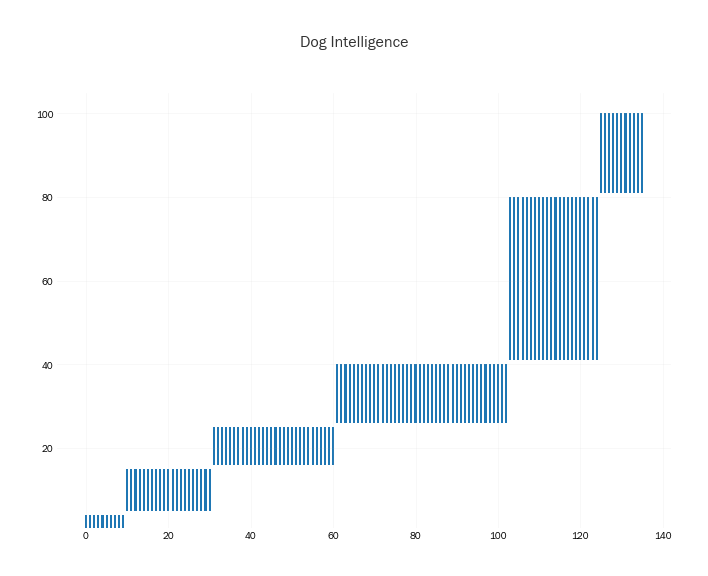

In [85]:
fig = dog_chart.initial_fig_axis()
ax = dog_chart.axes_set_up(fig)
ax.bar(left = dog_frame.index,bottom = dog_frame.reps_lower,height=(dog_frame.reps_upper-dog_frame.reps_lower),width=.5)
plt.show()

In [ ]:
#sql method
dog_frame = dw.query(dataset_key, 'SELECT * FROM dog_intelligence').dataframe